# Questão 1
Considere a base de dados banana_quality.data. A variável alvo é a qualidade da banana (última coluna nos dados). Realize a classificação usando o algoritmo Regressão Logística e determine a acurácia. Use como hiperparâmetros: solver = 'lbfgs', max_iter = 10000. Considere 20% dos dados no conjunto de teste (use random_state = 42 dentro da função train_test_split).<br>


Qual o valor da acurácia? (Escolha o valor mais próximo).<br>
a.0,2<br>
b.0,6<br>
c.0,3<br>
**d.0,9**<br>
e.0,5


# Libs

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import r2_score

# Importação dos dados

In [2]:
df = pd.read_csv(r'G:\Meu Drive\MBA_data_science\Introdução ciência de dados\Avaliação final\banana_quality.csv')
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [4]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [6]:
df['Quality'].unique()

array(['Good', 'Bad'], dtype=object)

In [32]:
pd.get_dummies(df, columns=['Quality'])

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality_Bad,Quality_Good
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,False,True
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,False,True
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,False,True
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,False,True
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,False,True
...,...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,True,False
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,True,False
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,True,False
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,True,False


In [34]:
dicio = {
    'Bad':0,
    'Good':1
}

df['NQuality'] = df['Quality'].map(dicio)

In [37]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality', 'NQuality'],
      dtype='object')

<Axes: >

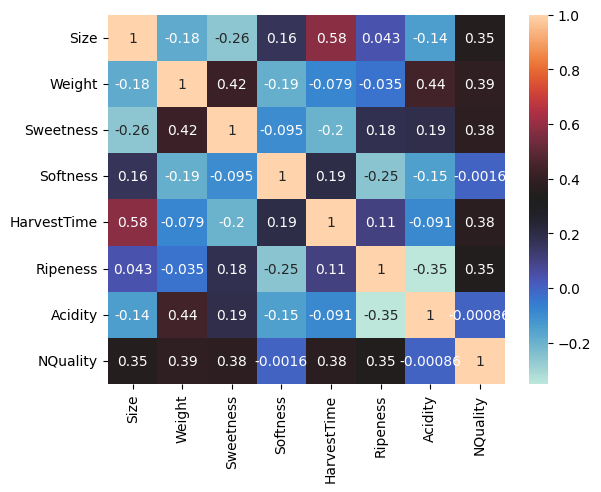

In [45]:
corr = df[['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness','Acidity', 'NQuality']]
sns.heatmap(corr.corr(), cmap='icefire', annot=True)

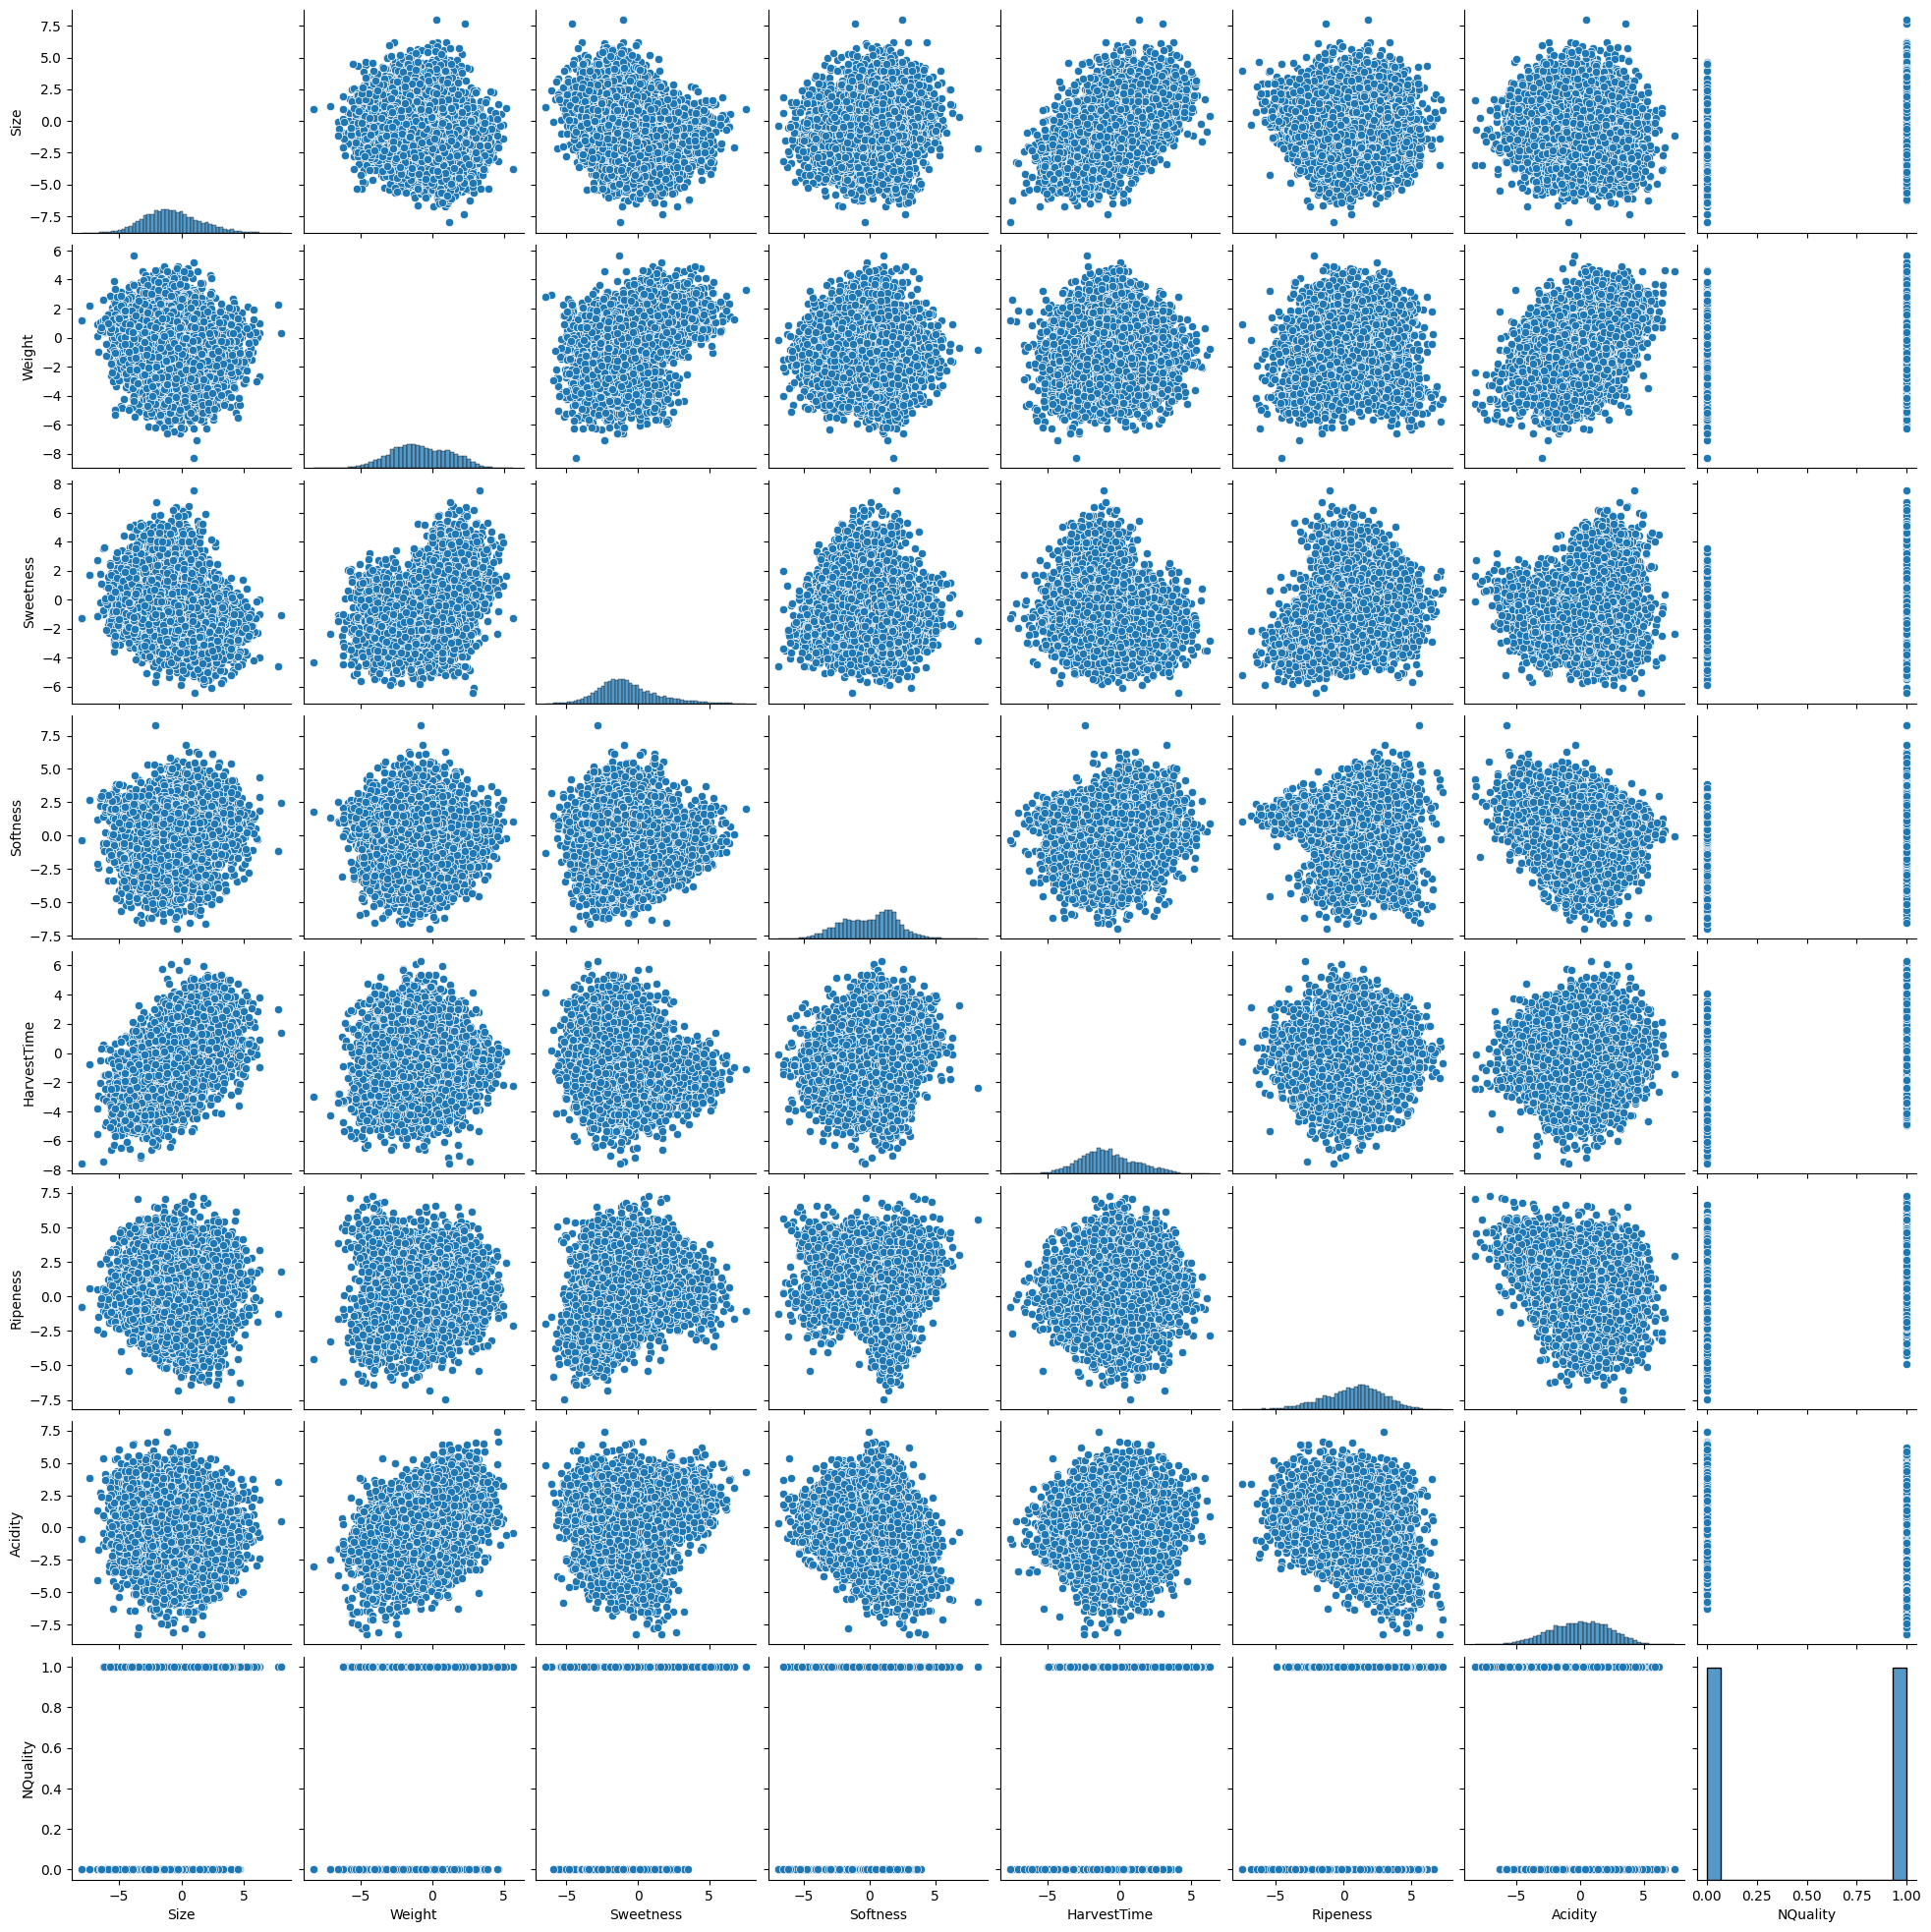

In [47]:
sns.pairplot(corr)

# Split treino e teste

In [21]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape

((6400, 7), (1600, 7))

# Regressão Logistica

In [48]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.879375

# Questão 2

Considere a base de dados de bananas novamente. Remova a última coluna dos dados ("Quality") e construa um modelo de regressão linear múltipla (LinearRegression) para predizer a variável "Acidity". Calcule o coeficiente R2. Considere 20% dos dados no conjunto de teste (use random_state = 42 dentro da função train_test_split).

 
Qual o valor do R2? (Escolha o valor mais próximo).
a.1,0<br>
b.0,8<br>
c.0,9<br>
d.0,7<br>
**e.0,3**

In [3]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [5]:
features = ['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness']
X = df[features]
y = df['Acidity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score(y_test, y_pred=y_pred)

0.3326426957967733

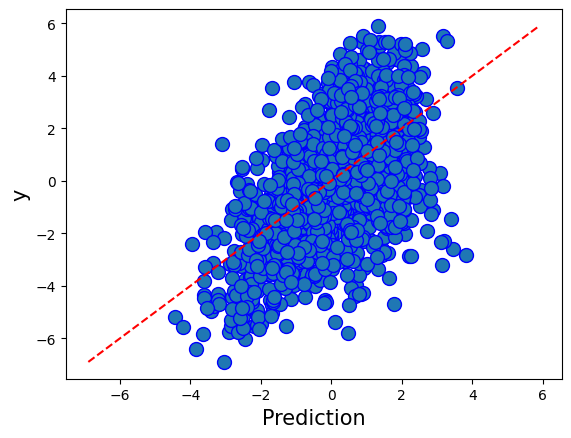

In [13]:

fig = plt.figure()
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

<Axes: xlabel='y_test', ylabel='preds'>

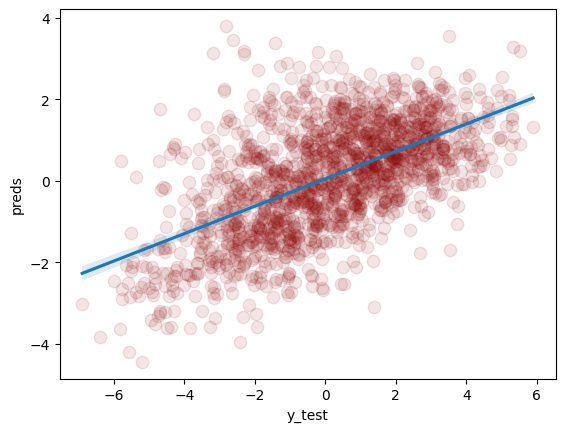

: 

In [33]:
plotDa = pd.DataFrame({'y_test':y_test,'preds':y_pred})
sns.regplot(
    x='y_test',
    y='preds', 
    data=plotDa, 
    fit_reg=True, 
    scatter_kws={'color': 'darkred', 'alpha': 0.1, 's': 80})
